<h2><b>自転車の盗難には何が関わっているのか？</b></h2>  
粟野翔

千葉市内の自転車盗難について対策したい。  
これまでのデータからどこでどのような対策をするかを考えましょう！

まずデータを読み込みます。

In [1]:
import pandas as pd

df = pd.read_csv("jitensha.csv")
df.head()

,罪名,手口,管轄警察署（発生地）,管轄交番・駐在所（発生地）,市区町村コード（発生地）,都道府県（発生地）,市区町村（発生地）,町丁目（発生地）,発生年月日（始期）,発生時（始期）,発生場所,発生場所の詳細,被害者の年齢,被害者の職業,施錠関係
0,窃盗,自転車盗,千葉中央,千葉寺駅前,121011.0,千葉県,千葉市中央区,青葉町,20240117,23,その他の住宅（３階建て以下共同住宅等）,駐車（輪）場,20歳代,大学生,施錠した
1,窃盗,自転車盗,千葉中央,千葉寺駅前,121011.0,千葉県,千葉市中央区,青葉町,20240227,18,駐車（輪）場,駐車（輪）場,10歳代,中学生,施錠せず
2,窃盗,自転車盗,千葉中央,千葉寺駅前,121011.0,千葉県,千葉市中央区,青葉町,20240528,20,駐車（輪）場,駐車（輪）場,40歳代,その他,施錠した
3,窃盗,自転車盗,千葉中央,千葉寺駅前,121011.0,千葉県,千葉市中央区,青葉町,20240627,21,駐車（輪）場,駐車（輪）場,10歳代,中学生,施錠せず
4,窃盗,自転車盗,千葉中央,千葉寺駅前,121011.0,千葉県,千葉市中央区,青葉町,20240917,14,その他,その他,20歳代,その他,施錠せず


すべての地区で対策するのは難しいので盗難が多い地域に絞り込みたいです。  
どの地区で何件くらい盗難されているのでしょうか？  
多い順に表示してみます。

In [2]:
df.groupby('市区町村（発生地）').size().sort_values(ascending=False)

市区町村（発生地）
船橋市        1263
市川市         872
柏市          691
松戸市         678
千葉市中央区      656
八千代市        458
習志野市        450
浦安市         435
野田市         367
千葉市稲毛区      334
千葉市美浜区      328
千葉市若葉区      313
流山市         302
千葉市花見川区     290
市原市         285
千葉市緑区       213
成田市         211
四街道市        165
木更津市        157
佐倉市         146
鎌ケ谷市        140
印西市         125
八街市         115
我孫子市        114
東金市         103
茂原市          94
君津市          84
旭市           64
白井市          63
館山市          52
富津市          45
袖ケ浦市         42
富里市          31
銚子市          30
酒々井町         30
大網白里市        26
山武市          24
香取市          22
一宮町          21
鴨川市          16
いすみ市         15
栄町           14
横芝光町         11
匝瑳市           9
長生村           9
南房総市          8
鋸南町           5
多古町           4
九十九里町         3
東庄町           3
神崎町           2
勝浦市           1
御宿町           1
睦沢町           1
白子町           1
dtype: int64

ちょっとわかりにくいのでグラフを作りましょう！  
円グラフを使います。

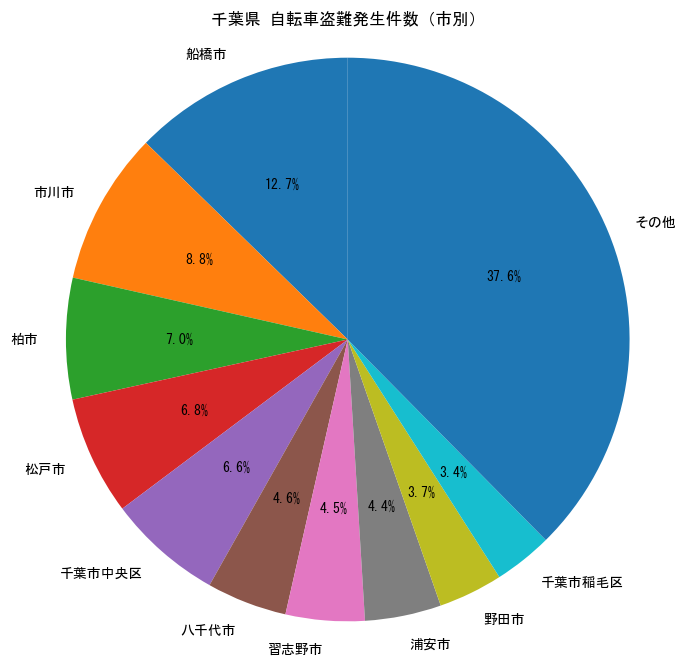

In [18]:
import csv
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib import rcParams

# 日本語フォント設定（Windows の場合）
rcParams['font.family'] = 'MS Gothic'

filename = "jitensha.csv"

# 市ごとの件数を集計
city_counts = Counter()
with open(filename, encoding='utf-8') as f:
    reader = csv.DictReader(f)
    for row in reader:
        city = row.get('市区町村（発生地）', '')
        if city:
            city_counts[city] += 1

# 上位10市を表示（その他はまとめる）
top_cities = city_counts.most_common(10)
other_count = sum(city_counts.values()) - sum(count for _, count in top_cities)

labels = [city for city, _ in top_cities] + ['その他']
sizes = [count for _, count in top_cities] + [other_count]

# 円グラフ描画
plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("千葉県 自転車盗難発生件数（市別）")
plt.axis('equal')  # 円を真円に
plt.show()


船橋市とその他の地域が同じ色になってしまいました…  
さらに千葉市が○○区で分かれているので本当はもっと千葉市が多いはずです。  

なぜこれらの地域で盗難が多いのか少し分析します。  
次のページから千葉県の市区町村別の人口をダウンロードしエクセルで調べてみました
https://www.pref.chiba.lg.jp/toukei/toukeidata/joujuu/geppou/saishin/setai.html


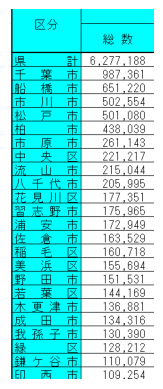

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 画像を読み込む
img = mpimg.imread("tibaken_hito.png")

# 表示
plt.imshow(img)
plt.axis("off")  # 枠を消す
plt.show()


人口が多い順に並べかえたのですがやはり人口が多い地域は盗難が多いです。  
単純な考えですが人口が多いところはしっかり対策したほうがいいですね。  

<h2><b>どの時期が一番盗難されるのか？</b></h2>  

ではいつ対策するのがよいのでしょうか？  
月別の盗難数を調べてみました

In [2]:
import pandas as pd
df = pd.read_csv("jitensha.csv")

df['発生日'] = pd.to_datetime(df['発生年月日（始期）'], format="%Y%m%d", errors='coerce')
df['月'] = df['発生日'].dt.month

df.groupby('月').size()


月
1.0      620
2.0      569
3.0      681
4.0      761
5.0      813
6.0      826
7.0     1027
8.0      943
9.0      984
10.0     956
11.0     888
12.0     782
dtype: int64

これを折れ線グラフにしたらもっと見やすいと思います

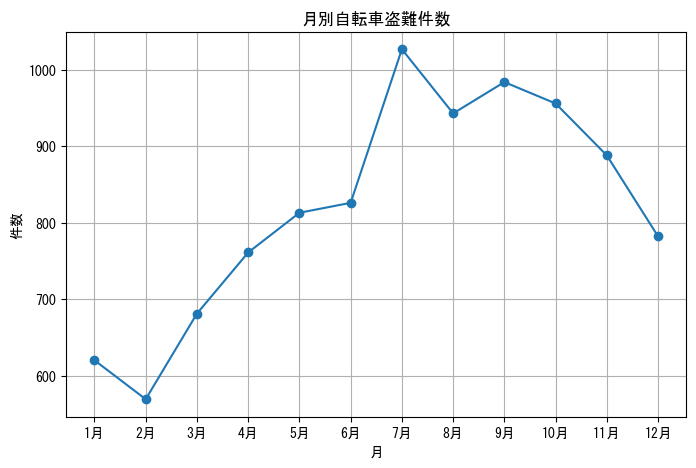

In [17]:
import csv
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 日本語フォントを設定
rcParams['font.family'] = 'MS Gothic'  # Windows の場合
# Mac の場合は 'Hiragino Sans', Linux は 'IPAexGothic' など

filename = "jitensha.csv"
months_count = [0]*12

with open(filename, encoding='utf-8') as f:
    reader = csv.DictReader(f)
    for row in reader:
        date_str = row.get('発生年月日（始期）', '')
        try:
            date = datetime.strptime(date_str, "%Y%m%d")
            months_count[date.month-1] += 1
        except:
            continue

# 折れ線グラフ
plt.figure(figsize=(8,5))
plt.plot(range(1,13), months_count, marker='o')
plt.xticks(range(1,13), [f"{i}月" for i in range(1,13)])
plt.xlabel("月")
plt.ylabel("件数")
plt.title("月別自転車盗難件数")
plt.grid(True)
plt.show()



7月が一番多いですね！  
盗難数は暖かくなると増えて、寒くなると減るようです。虫みたいですね  
この結果から冬に準備をして春ごろから対策するのが良さそうです！

# 被害者の職業は…？

どのような人がよく盗難されているか調べれば効果的な対策がでいると思います。

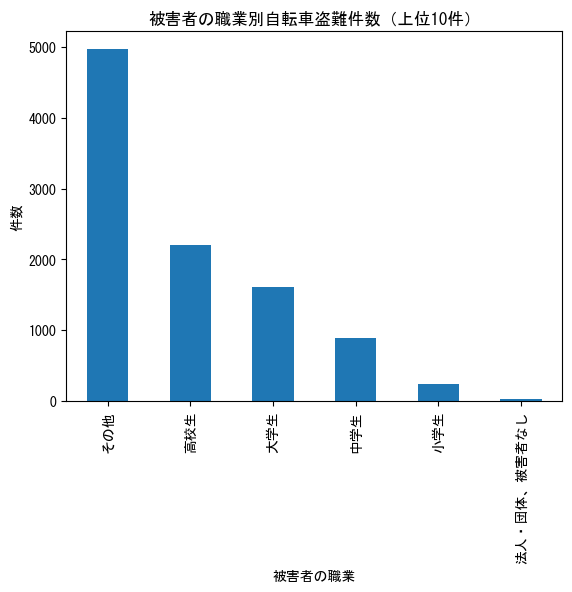

In [7]:
# bar graph of 被害者の職業
import matplotlib.pyplot as plt

# fix japanese font issue for mac
plt.rcParams['font.family'] = 'Hiragino Sans'

# fix japanese font issue for windows
plt.rcParams['font.family'] = 'MS Gothic'

occupation_counts = df['被害者の職業'].value_counts().head(10)  # top 10 occupations
occupation_counts.plot(kind='bar')
plt.xlabel('被害者の職業')
plt.ylabel('件数')
plt.title('被害者の職業別自転車盗難件数（上位10件）')
plt.show()

学生が自転車をよく盗難されるみたいです。  
学校のまわりで盗難されそうな場所を重点的に調べたほうがいいですね。  
また学生に鍵をちゃんとつけているか調査することも大切だと思います。

最後に***folium***を使って盗難発生地点のマップを作成します！  

In [8]:
import pandas as pd
from geopy.geocoders import Nominatim
import time
import folium
from folium.plugins import HeatMap


# CSV読み込み
df = pd.read_csv("jitensha.csv")

# 市区町村住所の作成（スペース入り）
df["市区町村住所"] = (
    df["都道府県（発生地）"].fillna("") + " " + df["市区町村（発生地）"].fillna("")
).str.strip()

# ★ 住所が空の行を削除（重要）
df = df[df["市区町村住所"] != ""]

# ユニークな市区町村だけ geocode
unique_muni = df["市区町村住所"].unique()

geolocator = Nominatim(user_agent="jitensha_map", timeout=10)
cache = {}
print("市区町村単位の位置情報取得中…")

for addr in unique_muni:
    try:
        location = geolocator.geocode(addr)
        time.sleep(1)
        if location:
            cache[addr] = (location.latitude, location.longitude)
            print(addr, "→ 成功")
        else:
            cache[addr] = (None, None)
            print(addr, "→ 失敗")
    except:
        cache[addr] = (None, None)
        print(addr, "→ エラー")

# 元データに緯度経度を付与
df["lat"] = df["市区町村住所"].map(lambda x: cache[x][0])
df["lon"] = df["市区町村住所"].map(lambda x: cache[x][1])

# ★ 緯度・経度がない行を削除（これで folium が必ず動く）
df_map = df.dropna(subset=["lat", "lon"])

# 地図の中心（平均値）
center_lat = df_map["lat"].mean()
center_lon = df_map["lon"].mean()

# folium マップ
m = folium.Map(location=[center_lat, center_lon], zoom_start=10)

# ヒートマップ用のデータ作成（lat, lon, weight）
heat_data = []

# 市区町村ごとに件数を重みづけ
for muni, group in df_map.groupby("市区町村住所"):
    lat = group.iloc[0]["lat"]
    lon = group.iloc[0]["lon"]
    count = len(group)  # 件数を重みにする
    heat_data.append([lat, lon, count])

# ヒートマップを追加
HeatMap(heat_data, radius=25).add_to(m)

# 保存
m.save("jitensha_municipal_heatmap.html")
print("市区町村ヒートマップを jitensha_municipal_heatmap.html に保存しました！")

# Notebook に表示
from IPython.display import HTML
HTML(m._repr_html_())


市区町村単位の位置情報取得中…
千葉県 千葉市中央区 → 成功
千葉県 千葉市緑区 → 成功
千葉県 習志野市 → 成功
千葉県 船橋市 → 成功
千葉県 市川市 → 成功
千葉県 浦安市 → 成功
千葉県 松戸市 → 成功
千葉県 野田市 → 成功
千葉県 柏市 → 成功
千葉県 八街市 → 成功
千葉県 佐倉市 → 成功
千葉県 酒々井町 → 成功
千葉県 成田市 → 成功
千葉県 栄町 → 成功
千葉県 富里市 → 成功
千葉県 鎌ケ谷市 → 成功
千葉県 印西市 → 成功
千葉県 白井市 → 成功
千葉県 多古町 → 成功
千葉県 香取市 → 成功
千葉県 東庄町 → 成功
千葉県 神崎町 → 成功
千葉県 銚子市 → 成功
千葉県 旭市 → 成功
千葉県 匝瑳市 → 成功
千葉県 山武市 → 成功
千葉県 横芝光町 → 成功
千葉県 東金市 → 成功
千葉県 大網白里市 → 成功
千葉県 九十九里町 → 成功
千葉県 一宮町 → 成功
千葉県 茂原市 → 成功
千葉県 白子町 → 成功
千葉県 睦沢町 → 成功
千葉県 長生村 → 成功
千葉県 いすみ市 → 成功
千葉県 御宿町 → 成功
千葉県 勝浦市 → 成功
千葉県 市原市 → 成功
千葉県 木更津市 → 成功
千葉県 袖ケ浦市 → 成功
千葉県 君津市 → 成功
千葉県 富津市 → 成功
千葉県 南房総市 → 成功
千葉県 鋸南町 → 成功
千葉県 館山市 → 成功
千葉県 鴨川市 → 成功
千葉県 千葉市稲毛区 → 成功
千葉県 千葉市美浜区 → 成功
千葉県 千葉市花見川区 → 成功
千葉県 八千代市 → 成功
千葉県 我孫子市 → 成功
千葉県 流山市 → 成功
千葉県 千葉市若葉区 → 成功
千葉県 四街道市 → 成功
市区町村ヒートマップを jitensha_municipal_heatmap.html に保存しました！


このページ上では見れないと思うのでスクリーンショットを表示します。  

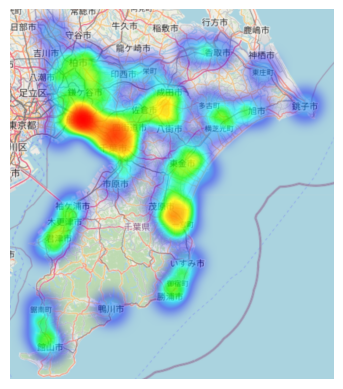

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 画像を読み込む
img = mpimg.imread("jitensha_heatmap.png")

# 表示
plt.imshow(img)
plt.axis("off")  # 枠を消す
plt.show()


  結構分かりやすくなりました。  
  盗難された場所と数が分かりやすいのでヒートマップを作ってみました。  
  
  

# 感想  
今回はかなり多くの種類のグラフを使えました。分析したいテーマにあわせて一番適切なグラフを選択するのは楽しかったです。  
